<a href="https://colab.research.google.com/github/Vanitharavi245/EDA/blob/main/Black_Friday_.Feature%20Engineering%26%20feature%20Scalig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_train=pd.read_csv('/content/black_friday train.csv')
df_test=pd.read_csv("/content/black_friday test.csv")

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
final = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
final.drop(['User_ID'], axis=1, inplace=True)

In [ ]:
final['Gender']=final['Gender'].map({'F':0,"M":1})


In [ ]:
final['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
final['Age']=final['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4})

In [ ]:
final.isnull().sum()

,0
Product_ID,0
Gender,783667
Age,150641
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [ ]:
final['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df_city=pd.get_dummies(final['City_Category'], drop_first=True)
final=pd.concat([final, df_city], axis=1)
final.drop ('City_Category', axis=1, inplace=True)

In [ ]:
final.isnull().sum()

,0
Product_ID,0
Gender,0
Age,150641
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [ ]:
final['Product_Category_2'].unique()
final['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [ ]:
final['Product_Category_2'].mode()[0]

8.0

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         633026 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(4), int64(4), object(2)
memory usage: 61.3+ MB


In [ ]:
final['Product_Category_2']=final['Product_Category_2'].fillna(final['Product_Category_2'].mode()[0])

In [ ]:
final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].str.replace('+'," ")

In [ ]:
final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].astype(int)

<Axes: xlabel='Age', ylabel='Purchase'>

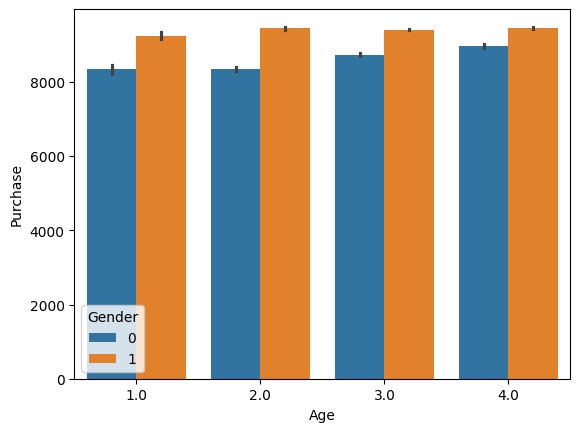

In [ ]:
import seaborn as sns
sns.barplot(x='Age', y='Purchase', hue='Gender', data=final)



Observation : Male has purchased higher than female among all age categories

<Axes: xlabel='Occupation', ylabel='Purchase'>

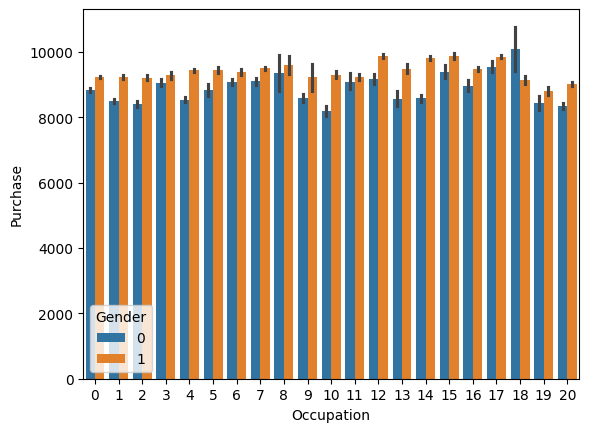

In [ ]:
sns.barplot(x='Occupation', y="Purchase", hue='Gender', data=final)

In [ ]:
final['Product_Category_1']=final['Product_Category_1'].astype(int)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

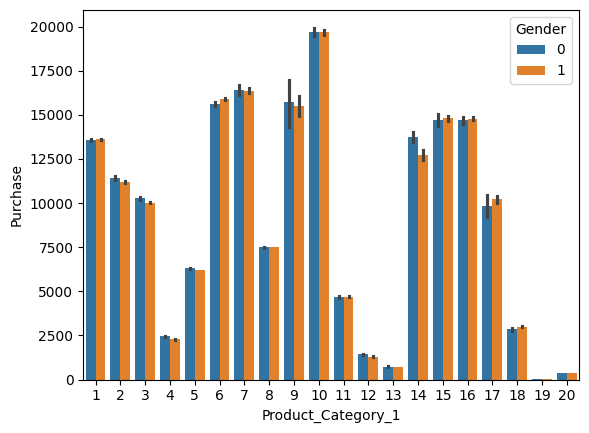

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender', data=final)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

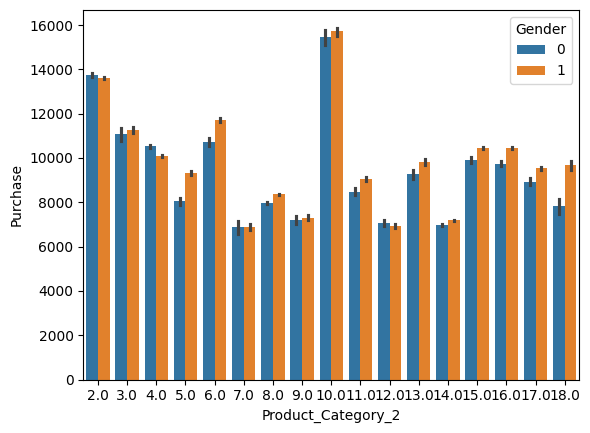

In [ ]:
sns.barplot(x='Product_Category_2', y="Purchase", hue='Gender', data=final)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

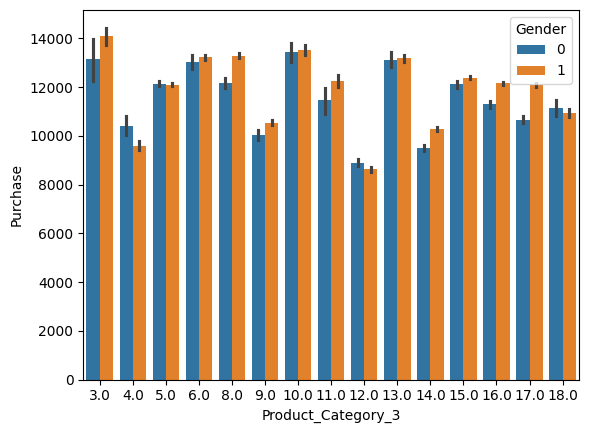

In [ ]:
sns.barplot(x='Product_Category_3', y="Purchase", hue='Gender', data=final)

#Feature Scaling

In [ ]:
df_test=final[final['Purchase'].isnull()]

In [ ]:
df_train=final[~final['Purchase'].isnull()]

In [ ]:
x=df_train.drop('Purchase', axis=1)

In [ ]:
y=df_train['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the data
df_test = final[final['Purchase'].isnull()]
df_train = final[~final['Purchase'].isnull()]

# Separating features and target variable
x = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']

# Drop columns like 'Product_ID' (or any other non-relevant string columns)
x = x.drop(['Product_ID'], axis=1)

# One-hot encode categorical variables (like 'Gender', 'Age', etc.)
x = pd.get_dummies(x, drop_first=True)

# Splitting into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Standardizing the data
sc = StandardScaler()

# Fitting the scaler on training data and transforming both training and testing data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Checking the transformed data
print(x_train[:5])


[[ 0.57141282 -1.2262961   0.90867822  0.88362201 -0.83402516 -1.11943802
  -1.69098613         nan  1.17569512 -0.67282374]
 [ 0.57141282         nan -1.23820419 -1.44207714  1.1990046   0.65927806
   1.57019983         nan -0.85056064 -0.67282374]
 [ 0.57141282  1.34145156  1.36872445 -1.44207714 -0.83402516 -0.61123342
  -1.22510242 -0.1605874  -0.85056064  1.48627336]
 [ 0.57141282  0.05757773 -0.62480922 -0.66684409 -0.83402516  0.65927806
   1.57019983         nan  1.17569512 -0.67282374]
 [-1.75004823  1.34145156  1.82877068  0.88362201  1.1990046  -0.61123342
  -1.22510242 -0.1605874   1.17569512 -0.67282374]]
